Training model score (Logistic Regression): 0.8446601941747572
The Logistic Regression Model score is 0.864406779661017


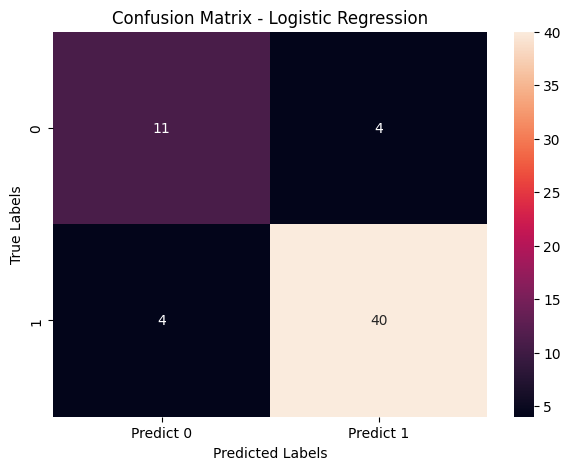

[[11  4]
 [ 4 40]]
TP = 40
TN = 11
FN = 4
FP = 4
ACCURACY of model is: 86.44%
SENSITIVITY of the model is: 90.91%
SPECIFICITY of the model is: 73.33%
FALSE POSITIVE RATE of the model is: 26.67%
PRECISION of the model is: 90.91%
Classification Report - Logistic Regression
              precision    recall  f1-score   support

           1       0.91      0.91      0.91        44
           0       0.73      0.73      0.73        15

    accuracy                           0.86        59
   macro avg       0.82      0.82      0.82        59
weighted avg       0.86      0.86      0.86        59



In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE

# Load the dataset
data_path = 'Data - Parkinsons.csv'
pdata = pd.read_csv(data_path)

# Data preprocessing
pdata = pdata.drop(['name'], axis=1)  # Drop non-numeric or unnecessary columns
X = pdata.drop(['status'], axis=1)
y = pdata[['status']]

# Standardize the features
X_scaled = X.apply(zscore)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Logistic Regression Model
logreg_model = LogisticRegression()
logreg_model.fit(X_resampled, y_resampled.values.ravel())
y_predicted_logreg = logreg_model.predict(X_test)
logreg_model_score_train = logreg_model.score(X_resampled, y_resampled)
print("Training model score (Logistic Regression):", logreg_model_score_train)
logreg_model_score_test = logreg_model.score(X_test, y_test)
print('The Logistic Regression Model score is', logreg_model_score_test)

# Confusion Matrix
cm_logreg = metrics.confusion_matrix(y_test, y_predicted_logreg, labels=[0,1])
df_cm_logreg = pd.DataFrame(cm_logreg, index=['0', '1'], columns=['Predict 0', 'Predict 1'])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm_logreg, annot=True, fmt='g')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print Confusion Matrix
print(metrics.confusion_matrix(y_test, y_predicted_logreg))

# Calculate Metrics
TN = cm_logreg[0,0]
FP = cm_logreg[0,1]
FN = cm_logreg[1,0]
TP = cm_logreg[1,1]
print("TP =", TP)
print("TN =", TN)
print("FN =", FN)
print("FP =", FP)
print(f'ACCURACY of model is: {(TP + TN) / float(TP + TN + FN + FP) * 100:.2f}%')
print(f'SENSITIVITY of the model is: {TP / float(TP + FN) * 100:.2f}%')
print(f'SPECIFICITY of the model is: {TN / float(TN + FP) * 100:.2f}%')
print(f'FALSE POSITIVE RATE of the model is: {FP / float(TN + FP) * 100:.2f}%')
print(f'PRECISION of the model is: {TP / float(TP + FP) * 100:.2f}%')
print("Classification Report - Logistic Regression")
print(metrics.classification_report(y_test, y_predicted_logreg, labels=[1, 0]))
